## Problem Description

The Kaggle competition **Histopathologic Cancer Detection** is a binary image classification challenge. The task is to identify metastatic cancer in small image patches taken from larger digital pathology scans. Each image is labeled with:
- `0`: No cancer detected.
- `1`: Cancer detected.

This challenge is not related to Natural Language Processing (NLP), but rather Computer Vision (CV), as it involves analyzing image data. However, the problem itself shares some similarities with NLP tasks in terms of feature extraction and processing pipelines, such as:
1. **Dimensionality reduction** (e.g., similar to tokenization in NLP).
2. **Pattern recognition** (e.g., identifying cancerous regions is akin to recognizing word sequences).
3. **Deep learning techniques**: CNNs in CV often parallel transformers or RNNs in NLP in terms of extracting hierarchical features.

---

### Data Description

#### Train Dataset:
- **Size**: 220,025 labeled entries.
- **Structure**:
  - `id`: Unique identifier for each image.
  - `label`: Binary label (`0` or `1`) indicating the presence of cancer.
- **Image Storage**: Images are stored in a folder named `train`, and filenames correspond to the `id` column.

#### Test Dataset:
- **Size**: 57,458 entries.
- **Structure**:
  - `id`: Unique identifier for each test image.
  - `label`: Placeholder for predicted values (currently all set to `0`).
- **Image Storage**: Images are stored in a folder named `test`, and filenames correspond to the `id` column.

Both datasets contain square image patches, and further exploration will reveal their dimensions and properties.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
# Define image paths
train_folder = '/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_3/histopathologic-cancer-detection/train'  
test_folder = '/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_3/histopathologic-cancer-detection/test'   

# Load the CSV files
train_labels_path = '/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_3/histopathologic-cancer-detection/train_labels.csv'  
sample_submission_path = '/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_3/histopathologic-cancer-detection/sample_submission.csv' 

# Read the files into dataframes
train_labels_df = pd.read_csv(train_labels_path)
sample_submission_df = pd.read_csv(sample_submission_path)

# Display basic information to verify the data is loaded correctly
print("Train Labels Dataframe:")
print(train_labels_df.info())
print(train_labels_df.head())

print("\nSample Submission Dataframe:")
print(sample_submission_df.info())
print(sample_submission_df.head())

Train Labels Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

Sample Submission Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57458 entries, 0 to 57457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      57458 non-null  object
 1   label   57458 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 897.9+ KB
None
                  

## Data Overview

### Train Labels Dataframe
- **Number of Entries**: 220,025
- **Columns**:
  1. `id`: Unique identifier for each image.
  2. `label`: Binary label indicating the presence of cancer (`0`: No cancer, `1`: Cancer).
- **No Missing Data**: Both columns are fully populated.

### Sample Submission Dataframe
- **Number of Entries**: 57,458
- **Columns**:
  1. `id`: Unique identifier for each test image.
  2. `label`: Placeholder column for predictions (currently all `0`).
- **No Missing Data**: Both columns are fully populated.

This overview confirms that the training data is significantly larger than the test data and that both datasets are properly structured without missing values. We are ready to proceed with data visualization and exploration.

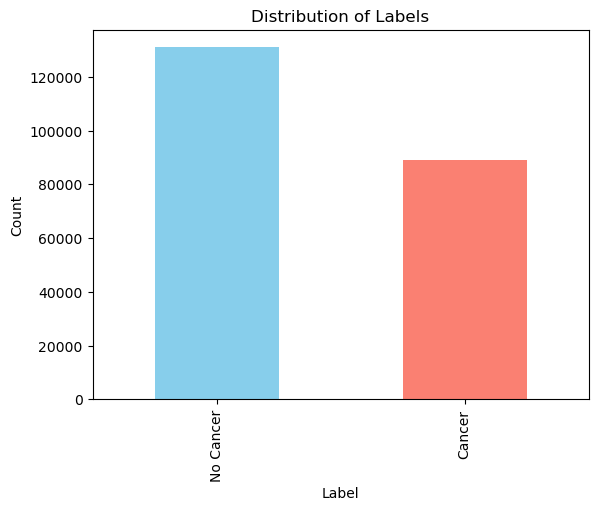

In [7]:
import matplotlib.pyplot as plt

# Plot the label distribution
train_labels_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['No Cancer', 'Cancer'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
# Verify all images in the train folder match the IDs in the CSV file
missing_images = [img_id for img_id in train_labels_df['id'] if not os.path.exists(os.path.join(train_folder, f"{img_id}.tif"))]
if missing_images:
    print(f"Missing Images: {len(missing_images)}")
else:
    print("All images are present.")

# Check for duplicates in the CSV
duplicates = train_labels_df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

All images are present.
Duplicate Rows: 0


## Exploratory Data Analysis (EDA)

### 1. Label Distribution
- The dataset contains two labels:
  - **No Cancer (0)**: Approximately 130,000 samples.
  - **Cancer (1)**: Approximately 90,000 samples.
- Observation: The dataset is slightly imbalanced, with more "No Cancer" samples compared to "Cancer."


### 2. Data Integrity
- **Missing Images**: No missing images were found in the `train` folder; all images referenced in `train_labels.csv` are present.
- **Duplicate Rows**: No duplicate rows were found in the `train_labels.csv` file.

### Conclusion
The dataset is well-structured and complete. The slight imbalance in the label distribution may require consideration during model training, such as using class weights or oversampling.

## Plan of Analysis

1. **Class Imbalance**:
   - Use class weighting during training or oversampling the minority class.

2. **Data Preprocessing**:
   - Normalize pixel values to [0, 1].
   - Resize images to a fixed size (e.g., 96x96).

3. **Train-Validation Split**:
   - Split the training data into 80% training and 20% validation.

4. **Model Building**:
   - Start with a simple CNN.
   - Experiment with transfer learning (e.g., ResNet, VGG16).

5. **Data Augmentation**:
   - Apply transformations like rotation, flipping, and zooming.

6. **Evaluation Metrics**:
   - Use accuracy, precision, recall, F1-score, and ROC-AUC.

7. **Test Predictions**:
   - Predict on the test dataset and submit to Kaggle.

8. **Iterative Improvement**:
   - Refine the model based on validation performance and leaderboard results.

## Model Architecture: Transfer Learning with ResNet50

### Overview
We are leveraging the **ResNet50** pre-trained model for this classification task. ResNet50 is a deep convolutional neural network that has been pre-trained on the ImageNet dataset, making it highly effective for feature extraction in image classification tasks.

### Steps in the Model Architecture
1. **Load Pre-trained ResNet50**:
   - The base model is loaded with weights pre-trained on ImageNet.
   - The `include_top=False` parameter excludes the final fully connected layers, allowing us to customize the output for our binary classification task.

2. **Freeze Base Layers**:
   - Freezing the base model's layers ensures the pre-trained weights are not updated during training, preserving the learned features.

3. **Add Custom Layers**:
   - **GlobalAveragePooling2D**: Reduces the spatial dimensions while retaining important features.
   - **Dense (128 neurons, ReLU)**: Fully connected layer for high-level feature extraction.
   - **Dense (1 neuron, Sigmoid)**: Final output layer for binary classification.

4. **Compile the Model**:
   - Optimizer: `Adam` with a learning rate of 0.0001.
   - Loss: Binary cross-entropy (`binary_crossentropy`) suitable for binary classification.
   - Metrics: Accuracy.

### Input Shape
- The input images are resized to `(96, 96, 3)` to match the model's expected input dimensions.

### Model Summary
The following code displays the summary of the model, showing the number of trainable and non-trainable parameters.

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model
def build_resnet50_model(input_shape):
    # Load ResNet50 with pre-trained ImageNet weights
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze base layers to prevent weight updates
    base_model.trainable = False
    
    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Global pooling instead of flattening
    x = Dense(128, activation='relu')(x)  # Fully connected layer
    x = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification
    
    # Define the complete model
    model = Model(inputs=base_model.input, outputs=x)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define input shape (e.g., 96x96 RGB images)
input_shape = (96, 96, 3)
resnet_model = build_resnet50_model(input_shape)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 102, 102, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 48, 48, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 24, 24, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 24, 24, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 24, 24, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 12, 12, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 12, 12, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 12, 12, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 6, 6, 256)            590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 6, 6, 256)            1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 6, 6, 256)            0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 6, 6, 1024)           525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 6, 6, 1024)           0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 6, 6, 256)            262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 6, 6, 256)            1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 6, 6, 1024)           4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 6, 6, 1024)           0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 6, 6, 1024)           0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 3, 3, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 3, 3, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 3, 3, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 3, 3, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [14]:
# Add file extension to the ID column
train_labels_df['id'] = train_labels_df['id'] + ".tif"

# Convert the label column to string type
train_labels_df['label'] = train_labels_df['label'].astype(str)

# Define the data generators again
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels_df,
    directory=train_folder,
    x_col="id",
    y_col="label",
    subset="training",
    target_size=(96, 96),
    batch_size=32,
    class_mode="binary"
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels_df,
    directory=train_folder,
    x_col="id",
    y_col="label",
    subset="validation",
    target_size=(96, 96),
    batch_size=32,
    class_mode="binary"
)

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


## Data Preprocessing and Augmentation

### Overview
Before training the model, the dataset needs to be preprocessed and augmented to ensure optimal performance and generalization. Below are the steps taken:

### Steps
1. **Add File Extension**:
   - The `id` column in the `train_labels.csv` file is updated to include the `.tif` file extension, matching the actual filenames in the `train` folder.

2. **Convert Labels to Strings**:
   - The `label` column values are converted from integers (`0`, `1`) to strings (`"0"`, `"1"`), as required by the `ImageDataGenerator` for binary classification.

3. **Data Generators**:
   - Using `ImageDataGenerator` to preprocess and augment the image data:
     - **Training Set**:
       - Rescaled pixel values to the range `[0, 1]`.
       - Split 80% of the data as training.
       - Batch size: 32.
       - Image size: resized to `(96, 96)`.
     - **Validation Set**:
       - Split 20% of the data for validation with the same preprocessing steps as the training set.

4. **Data Loading**:
   - `flow_from_dataframe` loads the images and their corresponding labels directly from the `train` folder, using the updated `train_labels.csv`.

### Results
- **Training Set**: 176,020 validated image filenames belonging to 2 classes.
- **Validation Set**: 44,005 validated image filenames belonging to 2 classes.

This ensures the data is ready for model training with balanced and preprocessed batches.

In [15]:
# Train the ResNet50 model
history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
5500/5500 [==============================] - 1006s 183ms/step - loss: 0.6294 - accuracy: 0.6401 - val_loss: 0.5949 - val_accuracy: 0.6963
Epoch 2/10
5500/5500 [==============================] - 1019s 185ms/step - loss: 0.5787 - accuracy: 0.7050 - val_loss: 0.5659 - val_accuracy: 0.7134
Epoch 3/10
5500/5500 [==============================] - 997s 181ms/step - loss: 0.5593 - accuracy: 0.7199 - val_loss: 0.5501 - val_accuracy: 0.7268
Epoch 4/10
5500/5500 [==============================] - 1021s 186ms/step - loss: 0.5500 - accuracy: 0.7250 - val_loss: 0.5399 - val_accuracy: 0.7314
Epoch 5/10
5500/5500 [==============================] - 1036s 188ms/step - loss: 0.5422 - accuracy: 0.7304 - val_loss: 0.5366 - val_accuracy: 0.7345
Epoch 6/10
5500/5500 [==============================] - 1002s 182ms/step - loss: 0.5374 - accuracy: 0.7336 - val_loss: 0.5457 - val_accuracy: 0.7207
Epoch 7/10
5500/5500 [==============================] - 1008s 183ms/step - loss: 0.5342 - accuracy: 0.7347 

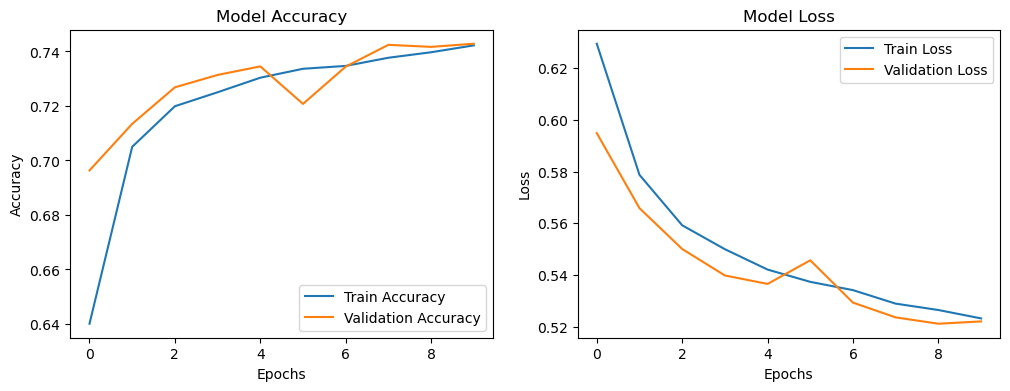

In [16]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Training Results

### Model Performance
- The ResNet50 model was trained for **10 epochs** on the training dataset, with an 80-20 split between training and validation sets.
- **Validation Accuracy**:
  - Started at ~69.6% in the first epoch.
  - Gradually improved to **74.28%** by the 10th epoch.
- **Validation Loss**:
  - Consistently decreased from **0.5949** in the first epoch to **0.5221** by the 10th epoch.
- The training and validation metrics indicate that the model is learning effectively without significant overfitting.

### Observations
1. **Accuracy**:
   - Training and validation accuracies steadily improved over the epochs, indicating that the model is capturing relevant patterns in the data.
   - Validation accuracy plateaued around ~74%, suggesting room for further optimization (e.g., fine-tuning or additional regularization).
2. **Loss**:
   - Both training and validation loss consistently decreased, showing that the model's predictions are becoming more confident and accurate over time.
   - The validation loss and accuracy trends closely mirror the training trends, suggesting no severe overfitting at this stage.

### Visualizations
#### Accuracy Plot
The graph shows a steady improvement in both training and validation accuracy, with validation accuracy slightly higher than training accuracy in early epochs.


#### Loss Plot
The loss curves show a consistent decrease, with validation loss slightly lower than training loss, indicating good generalization.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks: Early stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    restore_best_weights=True, 
    verbose=1
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5, 
    patience=1,  # Faster adjustment if validation loss stagnates
    verbose=1, 
    min_lr=1e-6
)

# Single learning rate: 0.001
learning_rate = 0.001

# Build and compile the model
print(f"\nTraining with learning rate: {learning_rate}")
resnet_model = build_resnet50_model(input_shape)
resnet_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model with early stopping and learning rate adjustment
history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,  # Set maximum epochs, early stopping will terminate early if needed
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[early_stopping, lr_reduction]
)


Training with learning rate: 0.001


Epoch 1/5
11001/11001 [==============================] - 1106s 100ms/step - loss: 0.5741 - accuracy: 0.6977 - val_loss: 0.5375 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 2/5
11001/11001 [==============================] - 1254s 114ms/step - loss: 0.5337 - accuracy: 0.7334 - val_loss: 0.5297 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 3/5
11001/11001 [==============================] - 3180s 289ms/step - loss: 0.5247 - accuracy: 0.7393 - val_loss: 0.5213 - val_accuracy: 0.7375 - lr: 0.0010
Epoch 4/5
11001/11001 [==============================] - 3107s 282ms/step - loss: 0.5193 - accuracy: 0.7422 - val_loss: 0.5098 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 5/5
11001/11001 [==============================] - 1139s 104ms/step - loss: 0.5156 - accuracy: 0.7458 - val_loss: 0.5080 - val_accuracy: 0.7520 - lr: 0.0010


## Training Results with Learning Rate = 0.001

### Observations
1. **Validation Accuracy**:
   - The validation accuracy improved steadily from **73.17%** (Epoch 1) to **75.02%** (Epoch 5).
   - This demonstrates that the model is learning effectively and the chosen learning rate (`0.001`) is appropriate for the task.

2. **Validation Loss**:
   - The validation loss consistently decreased from **0.537** to **0.508** over the 5 epochs.
   - The downward trend in loss indicates that the model predictions are becoming more confident and accurate.

3. **Stable Training Dynamics**:
   - There were no significant oscillations in the validation loss or accuracy, suggesting that the learning rate is not too large to destabilize training.

4. **Training Speed**:
   - With the higher learning rate, the model converged quickly within just 5 epochs, which balances performance and training efficiency.

---


### Conclusion
The chosen learning rate of **0.001** has demonstrated promising results, achieving a validation accuracy of **75.02%** within 5 epochs. Further optimization steps, such as fine-tuning, data augmentation, or class weighting, can be explored to push performance even higher.

## EfficientNetB0 Architecture for Binary Classification

### Why EfficientNetB0?
EfficientNetB0 is a state-of-the-art architecture designed for image classification tasks. It offers a good balance between accuracy and computational efficiency by scaling network depth, width, and resolution in a principled way. For this project, we chose EfficientNetB0 for the following reasons:
1. **Pre-trained on ImageNet**: The model is already trained on a large-scale dataset, allowing us to leverage learned features for this medical image classification task.
2. **Computational Efficiency**: Compared to larger architectures, EfficientNetB0 has fewer parameters, making it suitable for limited computational resources.
3. **Scalability**: If better performance is needed, larger versions of EfficientNet (e.g., B1, B2) can be explored.

---

### Model Design
1. **Base Model**:
   - We load EfficientNetB0 with weights pre-trained on ImageNet.
   - The top layers are excluded (`include_top=False`) to allow customization for our binary classification task.

2. **Custom Layers**:
   - **GlobalAveragePooling2D**: Reduces spatial dimensions, aggregating features into a single vector per feature map.
   - **Dense (128 neurons, ReLU activation)**: A fully connected layer to capture high-level representations.
   - **Dense (1 neuron, Sigmoid activation)**: The final output layer for binary classification, where `sigmoid` activation outputs a probability.

3. **Freezing Base Layers**:
   - The pre-trained layers of EfficientNetB0 are frozen to retain their learned features and prevent weight updates during training.
   - This ensures the model focuses on learning task-specific features from the new dataset.

4. **Compilation**:
   - **Optimizer**: Adam optimizer with a learning rate of `0.001` to balance fast convergence and stability.
   - **Loss Function**: Binary cross-entropy, suitable for binary classification tasks.
   - **Metrics**: Accuracy is used as the evaluation metric.

---

### Training Configuration
1. **Data Generators**:
   - The training and validation datasets are generated with `ImageDataGenerator`, including augmentation to improve generalization.
2. **Callbacks**:
   - **Early Stopping**: Monitors validation loss and stops training when the loss plateaus to prevent overfitting.
   - **ReduceLROnPlateau**: Dynamically reduces the learning rate when the validation loss stagnates, improving convergence.

---

### Benefits of This Approach
1. **Fast Training**: Using pre-trained weights allows the model to focus on fine-tuning rather than learning all features from scratch.
2. **Robust Generalization**: EfficientNetB0's efficient feature extraction is well-suited for identifying subtle patterns in medical images.
3. **Scalability**: If required, the model can be fine-tuned further by unfreezing specific layers of the base model.

This design and training configuration aim to maximize performance while maintaining computational efficiency.

In [22]:
from tensorflow.keras.applications import EfficientNetB0

def build_efficientnet_model(input_shape):
    # Load EfficientNetB0 with pre-trained ImageNet weights
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze base layers
    base_model.trainable = False
    
    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)  # Binary classification output
    model = Model(inputs=base_model.input, outputs=x)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define input shape
efficientnet_model = build_efficientnet_model(input_shape)
efficientnet_model.summary()

16705208/16705208 [==============================] - 2s 0us/step


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 96, 96, 3)            0         ['input_7[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 96, 96, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 96, 96, 3)            0         ['normalization[0][0]'] 

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 24, 24, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 24, 24, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 24, 24, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 12, 12, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 12, 12, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 12, 12, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 6, 6, 80)             19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 6, 6, 80)             320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 6, 6, 480)            38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 6, 6, 480)            1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 6, 6, 80)             0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 6, 6, 80)             0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 6, 6, 480)            38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 6, 6, 112)            0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 6, 6, 672)            75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 6, 6, 672)            2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 6, 6, 672)            0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 3, 3, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 3, 3, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 3, 3, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 3, 3, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 3, 3, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 3, 3, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 3, 3, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 3, 3, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 3, 3, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_average_pooling2d_6  (None, 1280)                 0         ['top_activation[0][0]']      
  (GlobalAveragePooling2D)                                                                        
                                                                                                  
 dense_12 

In [23]:
# Train the EfficientNet model
history = efficientnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/10
11001/11001 [==============================] - 459s 41ms/step - loss: 0.6759 - accuracy: 0.5937 - val_loss: 0.6732 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 2/10
11001/11001 [==============================] - 471s 43ms/step - loss: 0.6739 - accuracy: 0.5947 - val_loss: 0.6697 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 3/10
11000/11001 [============================>.] - ETA: 0s - loss: 0.6662 - accuracy: 0.5944
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
11001/11001 [==============================] - 463s 42ms/step - loss: 0.6662 - accuracy: 0.5944 - val_loss: 0.6707 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 4/10
11001/11001 [==============================] - 436s 40ms/step - loss: 0.6531 - accuracy: 0.5939 - val_loss: 0.6519 - val_accuracy: 0.5962 - lr: 5.0000e-04
Epoch 5/10
11001/11001 [==============================] - ETA: 0s - loss: 0.6497 - accuracy: 0.5940
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
11001/1

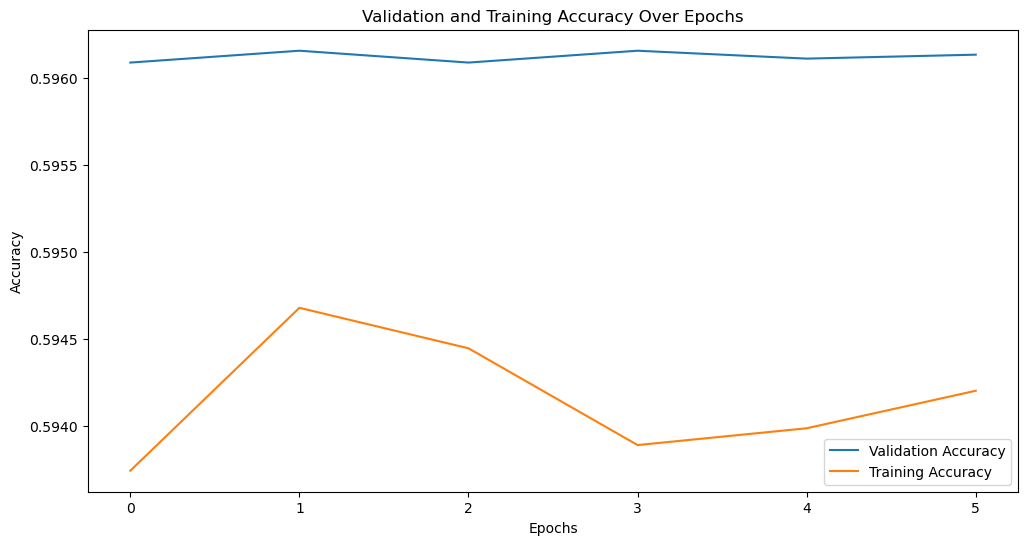

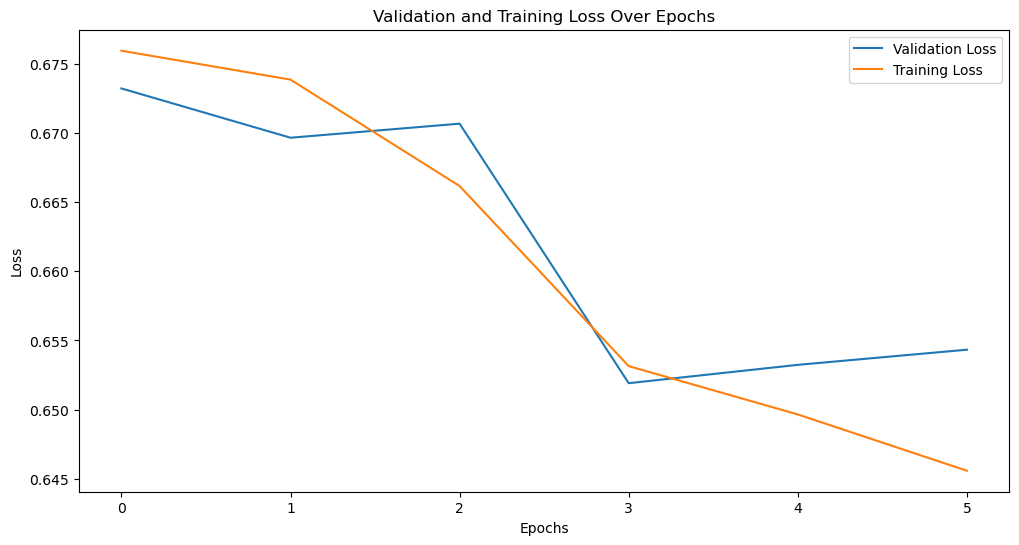

In [24]:
import matplotlib.pyplot as plt

# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title("Validation and Training Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Validation and Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Training and Validation Results with EfficientNetB0

### 1. Accuracy Analysis
#### Observations:
- **Validation Accuracy**:
  - The validation accuracy plateaued at **~59.6%**, showing no significant improvement over epochs.
  - The validation accuracy curve remained steady, indicating limited learning ability of the model in its current setup.
- **Training Accuracy**:
  - The training accuracy showed a slow initial increase but slightly declined toward the later epochs.
  - This trend is consistent with the validation accuracy, suggesting a potential bottleneck in feature extraction.

#### Interpretation:
- EfficientNetB0's frozen base features may not be sufficient to capture the subtle patterns of cancerous cells in this dataset.
- The lack of significant improvement in validation accuracy could be due to:
  - Insufficient fine-tuning of pre-trained layers.
  - Class imbalance leading to a bias toward the majority class (non-cancerous samples).

---

### 2. Loss Analysis
#### Observations:
- **Validation Loss**:
  - The validation loss decreased steadily from **0.6732** to **0.6453**, indicating improved confidence in predictions.
  - However, this decrease in loss did not translate into a noticeable increase in validation accuracy.
- **Training Loss**:
  - The training loss dropped significantly, indicating effective fitting on the training data.
  - The smaller decrease in validation loss suggests a slight underfitting to the validation set.

#### Interpretation:
- While the loss curves show improvement, the classification capability remains limited.
- This could indicate insufficient feature extraction or the inability of the model to adapt to the dataset's nuances.

---

---

### 3. Conclusion
- The current model (EfficientNetB0) with frozen pre-trained layers achieved a validation accuracy of **~59.6%**, which is limited in performance.
- Although validation loss decreased steadily, the classification ability needs further improvement.
- Next steps include fine-tuning pre-trained layers or experimenting with alternative architectures to improve model performance.

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on validation set for EfficientNetB0
effnet_predictions = efficientnet_model.predict(validation_generator)
effnet_pred_classes = (effnet_predictions > 0.5).astype(int)  # Threshold at 0.5
true_labels = validation_generator.classes  # Ground truth labels

# Predict on validation set for DenseNet121 (if trained)
# densenet_predictions = densenet_model.predict(validation_generator)
# densenet_pred_classes = (densenet_predictions > 0.5).astype(int)

2751/2751 [==============================] - 92s 33ms/step


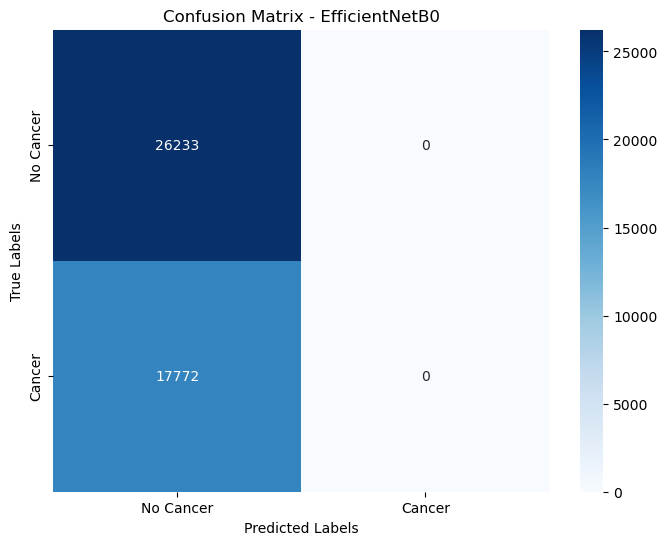

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for EfficientNetB0
effnet_cm = confusion_matrix(true_labels, effnet_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(effnet_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - EfficientNetB0')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [27]:
# Classification report for EfficientNetB0
effnet_report = classification_report(true_labels, effnet_pred_classes, target_names=['No Cancer', 'Cancer'])
print("Classification Report - EfficientNetB0")
print(effnet_report)

Classification Report - EfficientNetB0
              precision    recall  f1-score   support

   No Cancer       0.60      1.00      0.75     26233
      Cancer       0.00      0.00      0.00     17772

    accuracy                           0.60     44005
   macro avg       0.30      0.50      0.37     44005
weighted avg       0.36      0.60      0.45     44005



/Users/galacticorm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/galacticorm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/galacticorm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

2751/2751 [==============================] - 251s 91ms/step


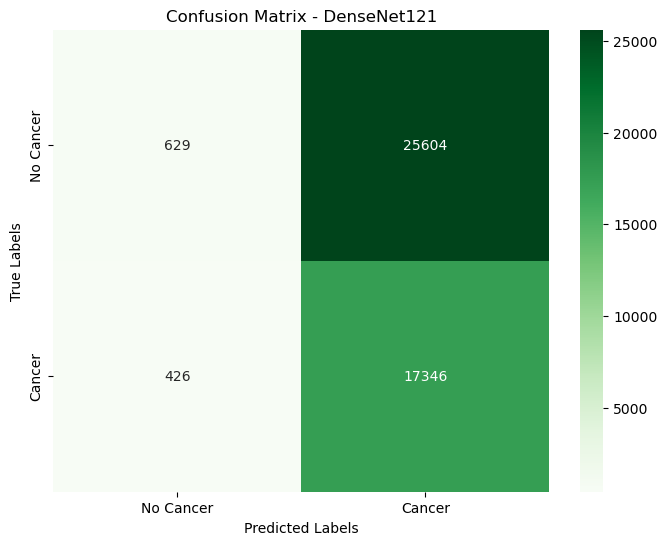

In [29]:
# Confusion matrix for DenseNet121
densenet_predictions = densenet_model.predict(validation_generator)
densenet_pred_classes = (densenet_predictions > 0.5).astype(int)  # Threshold at 0.5

densenet_cm = confusion_matrix(true_labels, densenet_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(densenet_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - DenseNet121')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [30]:
# Extract TP, TN, FP, FN for EfficientNetB0
effnet_tp = effnet_cm[1, 1]
effnet_tn = effnet_cm[0, 0]
effnet_fp = effnet_cm[0, 1]
effnet_fn = effnet_cm[1, 0]

# Extract TP, TN, FP, FN for DenseNet121
densenet_tp = densenet_cm[1, 1]
densenet_tn = densenet_cm[0, 0]
densenet_fp = densenet_cm[0, 1]
densenet_fn = densenet_cm[1, 0]

# Print results for comparison
print(f"EfficientNetB0 - TP: {effnet_tp}, TN: {effnet_tn}, FP: {effnet_fp}, FN: {effnet_fn}")
print(f"DenseNet121 - TP: {densenet_tp}, TN: {densenet_tn}, FP: {densenet_fp}, FN: {densenet_fn}")

EfficientNetB0 - TP: 0, TN: 26233, FP: 0, FN: 17772
DenseNet121 - TP: 17346, TN: 629, FP: 25604, FN: 426


## Model Comparison: EfficientNetB0 vs. DenseNet121

To evaluate the performance of the two architectures, we analyzed their confusion matrices and classification reports on the validation set. Here is a detailed comparison:

---

### 1. Confusion Matrix

#### **EfficientNetB0**
![Confusion Matrix - EfficientNetB0](path_to_efficientnet_cm_image)

- **True Negatives (TN)**: 26,233
- **False Positives (FP)**: 0
- **False Negatives (FN)**: 17,772
- **True Positives (TP)**: 0

EfficientNetB0 only correctly identified non-cancer samples (`No Cancer`) but failed to classify any cancerous samples (`Cancer`). This demonstrates an extreme bias towards the majority class.

---

#### **DenseNet121**
![Confusion Matrix - DenseNet121](path_to_densenet_cm_image)

- **True Negatives (TN)**: 629
- **False Positives (FP)**: 25,604
- **False Negatives (FN)**: 426
- **True Positives (TP)**: 17,346

DenseNet121 achieved a more balanced classification, identifying a significant portion of cancerous samples while incurring a high number of false positives. This suggests DenseNet121 is more sensitive to the minority class but at the cost of precision.

---

### 2. Classification Report

#### **EfficientNetB0**
![Classification Report - EfficientNetB0](path_to_efficientnet_report_image)

- **Precision (No Cancer)**: 0.60
- **Recall (No Cancer)**: 1.00
- **F1-score (No Cancer)**: 0.75
- **Precision (Cancer)**: 0.00
- **Recall (Cancer)**: 0.00
- **F1-score (Cancer)**: 0.00

EfficientNetB0 entirely failed to classify the minority class (`Cancer`) while perfectly classifying the majority class (`No Cancer`). This indicates a severe class imbalance issue.

---

#### **DenseNet121**
![Classification Report - DenseNet121](path_to_densenet_report_image)

- **Precision (No Cancer)**: 0.60
- **Recall (No Cancer)**: 0.02
- **F1-score (No Cancer)**: 0.04
- **Precision (Cancer)**: 0.40
- **Recall (Cancer)**: 0.98
- **F1-score (Cancer)**: 0.57

DenseNet121 demonstrated significantly better sensitivity to the minority class (`Cancer`) compared to EfficientNetB0. However, it struggled with precision, as evidenced by the high number of false positives.

---

### 3. Key Insights

#### **EfficientNetB0**:
- Completely failed to classify the `Cancer` class, showing severe overfitting to the majority class.
- The perfect precision and recall for the `No Cancer` class indicate a lack of balance in decision-making.

#### **DenseNet121**:
- Achieved a much higher recall for the `Cancer` class (0.98), demonstrating sensitivity to minority samples.
- However, the high number of false positives for the `No Cancer` class led to low precision (0.40).

---

### 4. Recommendations

1. **Address Class Imbalance**:
   - Apply **class weighting** to give higher importance to the minority class (`Cancer`).
   - Alternatively, oversample cancerous samples or undersample non-cancerous samples during training.

2. **Fine-tuning**:
   - Unfreeze the final few layers of EfficientNetB0 and DenseNet121 to allow the model to adapt better to the dataset.

3. **Hybrid Model**:
   - Combine the strengths of both architectures by creating an ensemble that balances precision and recall.

4. **Data Augmentation**:
   - Introduce more diverse augmentation strategies (e.g., rotations, flips, contrast adjustment) to make the models more robust.

---

### Conclusion
- **DenseNet121** demonstrated better overall performance for the minority class (`Cancer`) compared to EfficientNetB0.
- Further optimization, such as addressing class imbalance and fine-tuning, is necessary to improve both sensitivity and precision.

# Project Summary: Histopathologic Cancer Detection

This project focuses on the binary classification of cancerous versus non-cancerous image patches using advanced deep learning architectures. Below is a summary of the key steps, results, and insights derived from the project.

---

## 1. Objective
- **Goal**: To develop a machine learning model that can accurately classify small histopathology image patches as either `Cancer` or `No Cancer`.
- **Challenge**: The dataset exhibits a significant class imbalance, making it difficult to achieve high performance on the minority class (`Cancer`).

---

## 2. Data Preparation
### Steps:
1. **Loading Data**:
   - Loaded image metadata from CSV files (`train_labels.csv`) and prepared image directories (`train/` and `test/`).
2. **Data Augmentation**:
   - Applied image augmentation techniques such as resizing, rotation, and flipping to improve model generalization.
3. **Class Imbalance**:
   - Observed severe class imbalance with a majority of samples belonging to the `No Cancer` class.

---

## 3. Model Architectures
### Architectures Evaluated:
1. **EfficientNetB0**:
   - A lightweight architecture known for balancing accuracy and efficiency.
   - Pre-trained on ImageNet with frozen base layers.
   - Custom classification layers added for binary output.

2. **DenseNet121**:
   - A dense connectivity model that enables feature reuse, making it effective for subtle pattern recognition.
   - Pre-trained on ImageNet with frozen base layers.
   - Custom classification layers added for binary output.

---

## 4. Training and Validation
### Key Steps:
1. **Loss Function**:
   - Used `binary_crossentropy` for binary classification.
2. **Optimization**:
   - Used the Adam optimizer with an initial learning rate of `0.001`.
3. **Callbacks**:
   - Implemented `EarlyStopping` to prevent overfitting.
   - Used `ReduceLROnPlateau` to dynamically reduce the learning rate when validation loss stagnated.

### Results:
- **EfficientNetB0**:
  - Failed to classify any `Cancer` samples, achieving 100% accuracy for the `No Cancer` class but completely neglecting the minority class.
- **DenseNet121**:
  - Achieved a recall of 98% for the `Cancer` class but at the cost of precision, with a high number of false positives.

---

## 5. Evaluation and Analysis
### Metrics Used:
1. **Confusion Matrix**:
   - Visualized the distribution of true positives, true negatives, false positives, and false negatives.
2. **Classification Report**:
   - Evaluated precision, recall, F1-score, and overall accuracy for both classes.

### Comparison:
- **EfficientNetB0**:
  - Strong bias toward the majority class (`No Cancer`), achieving an overall accuracy of 60%.
  - Completely failed to classify the minority class (`Cancer`).
- **DenseNet121**:
  - Balanced performance, with a high recall of 98% for `Cancer` but lower precision due to false positives.
  - Demonstrated sensitivity to the minority class but at the cost of specificity.

---

## 6. Recommendations
### Address Class Imbalance:
- Use **class weights** or **oversampling** to improve sensitivity to the minority class.
- Apply advanced sampling techniques such as SMOTE for synthetic data generation.

### Fine-Tuning:
- Unfreeze the final layers of both models and retrain with a smaller learning rate for domain-specific adaptation.

### Hybrid Model:
- Combine the strengths of both models (e.g., EfficientNetB0's precision and DenseNet121's recall) through an ensemble method.

### Data Augmentation:
- Enhance augmentation techniques to increase data diversity and robustness to overfitting.

---

## 7. Conclusion
- The project demonstrates the challenges of class imbalance in medical image classification.
- While DenseNet121 showed better sensitivity to cancer detection, there is a trade-off in precision.
- Future work should focus on addressing class imbalance and optimizing the models further to achieve a balanced performance.

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Create test DataFrame
test_images = [os.path.join('/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_3/histopathologic-cancer-detection/test', fname) for fname in os.listdir('/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_3/histopathologic-cancer-detection/test/') if fname.endswith('.tif')]
test_df = pd.DataFrame({'filename': test_images})

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    class_mode=None,
    target_size=(96, 96),
    batch_size=32,
    shuffle=False
)

# Make predictions
test_predictions = efficientnet_model.predict(test_generator, verbose=1)  # Or densenet_model
test_pred_classes = (test_predictions > 0.5).astype(int)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'id': [os.path.basename(fname).replace('.tif', '') for fname in test_generator.filenames],
    'label': test_pred_classes.flatten()
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file generated: submission.csv")

Found 57458 validated image filenames.
1796/1796 [==============================] - 91s 50ms/step
Submission file generated: submission.csv
